# Customer churn prediction Part I

**Purpose**: To predict customer churn by using <br>
(i) optimisation algorithm (**Genetic Algorithm**) for feature selection AND  <br>
(ii) supervised learning algorithm (**Decision Trees**)  <br>
**Date**: 20 February 2022 <br>

**Contents**

- [1 Global environment](#env)
- [2 Install packages](#install)
- [3 Import packages](#import)
- [4 Read data](#read)
- [5 Exploratory Data Analysis](#eda)
- [6 Data Pre-processing](#pre)
- [7 Evaluation of the Decision Trees models (without feature selection)](#eval_DT_no_FS)
- [8 Feature selection](#select)
- [9 File Output](#output)

In [1]:
# autosave every 60 seconds
%autosave 60

Autosaving every 60 seconds


<a name='env'></a>
# 1 Global environment

In [2]:
# check the python version on Anaconda 
! python --version

Python 3.7.11


<a name='install'></a>
# 2 Install packages

In [3]:
! pip install sklearn-genetic

In [4]:
! pip install pandas

In [5]:
! pip install matplotlib 

In [6]:
! pip install seaborn

In [7]:
! pip install plotly

In [8]:
! pip install statsmodels

In [9]:
! pip install -U yellowbrick

In [10]:
# in anaconda prompt
# conda install -c anaconda graphviz python-graphviz

<a name='import'></a>
# 3 Import packages

In [3]:
from genetic_selection import GeneticSelectionCV
import numpy as np # linear algebra
import pandas as pd # data processing
from math import * # module math
import matplotlib # visualization
import matplotlib.pyplot as plt 
from PIL import Image
import seaborn as sns # visualization
import itertools
import io
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) # visualization
import plotly.graph_objs as go # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns', None) # set the max number of column width to be shown
pd.set_option("max_colwidth", None) # set the max value of column width to be shown
pd.set_option("max_rows", 200) # set the max number of rows to be shown
matplotlib.rcParams['font.size'] = 20.0 # set the font size in the label 

<a name="read"></a>
# 4 Read data

In [4]:
# read the 6k small dataset provided 
df = pd.read_csv('cell2celltrain_Small_6k.csv')

In [5]:
df

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnsweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Churn
0,30.88,436,30,0.25,1,0,-112,0.1,11.0,0.3,20.0,11.3,0.0,136.3,24.3,7.0,158.0,94.7,11.3,0.0,2.3,20,1,1,APCFCH703,4,1,298,58,58,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,8,No,0,150,No,2-High,Other,Other,Yes,Yes
1,44.83,172,45,0,0,0,-12,-15.5,0.3,0.3,3.7,0.0,0.0,23.1,6.0,2.3,31.3,21.3,0.7,0.0,0.0,22,1,1,LOULEX606,2,1,659,28,0,No,No,Yes,Yes,Yes,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,0,80,No,2-High,Suburban,Other,No,No
2,42.63,838,50,0.74,5,0,28,-2.6,4.7,6.3,62.0,7.3,0.0,198.5,36.0,10.0,113.7,118.3,11.0,0.0,3.3,7,1,1,OMAOMA402,2,1,182,0,0,No,No,Yes,No,No,?,No,No,No,No,No,No,0,0,No,No,0,0,No,0,130,No,5-Low,Suburban,Other,?,No
3,33.49,358,50,0,0,0,-16,0,1.0,4.0,10.0,0.0,0.0,127.5,32.7,30.0,90.7,95.7,5.0,0.0,0.7,22,4,4,NSHNSH615,2,2,11,52,50,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,No,0,8,No,0,150,No,2-High,Town,Other,Yes,No
4,60.94,1276,60,4.7,0,0,-188,0.2,5.7,19.7,49.7,22.0,0.0,134.8,218.7,9.0,214.7,204.7,25.3,0.0,2.3,18,2,2,DALDAL214,2,2,257,0,0,No,Yes,Yes,No,No,?,No,No,No,No,No,No,0,0,Yes,No,0,0,No,0,30,No,5-Low,Other,Other,?,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6375,30.48,242,40,0.5,0,0,-9,0.5,6.0,9.7,70.0,1.7,0.3,12.8,27.7,0.7,59.0,50.0,15.7,0.0,0.0,9,1,1,NCRGRE336,1,1,264,50,50,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,No,1,6,No,0,?,No,7-Lowest,Town,Professiol,Yes,No
6376,66.17,559,45,0,80,0.6,548,59.3,3.0,1.3,20.0,0.0,0.0,26.8,6.7,3.3,50.3,33.7,4.3,0.0,0.0,17,2,2,INDIND317,1,1,504,60,54,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,0,?,No,2-High,Suburban,Other,Yes,No
6377,99.61,1147,60,1.73,101,0,-414,-29.6,19.0,1.3,36.7,2.3,0.0,211.4,80.0,2.7,263.0,156.7,20.3,0.0,8.0,14,1,1,SFRSCL408,3,3,27,0,0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,Yes,No,0,8,No,0,100,No,5-Low,Other,Other,?,No
6378,103.63,891,65,0.74,125,0.2,298,75.7,12.0,1.3,64.0,1.7,2.0,38.5,31.7,3.0,137.3,48.3,13.3,0.0,2.3,13,2,2,HARNEW203,2,2,131,0,0,No,No,Yes,No,No,?,No,No,No,No,No,No,0,0,Yes,No,0,0,No,0,10,No,5-Low,Suburban,Other,?,Yes


## replace the '?' by np.nan

In [6]:
df = df.replace('?', np.nan)

In [7]:
df

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnsweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Churn
0,30.88,436,30,0.25,1,0,-112,0.1,11.0,0.3,20.0,11.3,0.0,136.3,24.3,7.0,158.0,94.7,11.3,0.0,2.3,20,1,1,APCFCH703,4,1,298,58,58,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,8,No,0,150,No,2-High,Other,Other,Yes,Yes
1,44.83,172,45,0,0,0,-12,-15.5,0.3,0.3,3.7,0.0,0.0,23.1,6.0,2.3,31.3,21.3,0.7,0.0,0.0,22,1,1,LOULEX606,2,1,659,28,0,No,No,Yes,Yes,Yes,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,0,80,No,2-High,Suburban,Other,No,No
2,42.63,838,50,0.74,5,0,28,-2.6,4.7,6.3,62.0,7.3,0.0,198.5,36.0,10.0,113.7,118.3,11.0,0.0,3.3,7,1,1,OMAOMA402,2,1,182,0,0,No,No,Yes,No,No,NaN,No,No,No,No,No,No,0,0,No,No,0,0,No,0,130,No,5-Low,Suburban,Other,NaN,No
3,33.49,358,50,0,0,0,-16,0,1.0,4.0,10.0,0.0,0.0,127.5,32.7,30.0,90.7,95.7,5.0,0.0,0.7,22,4,4,NSHNSH615,2,2,11,52,50,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,No,0,8,No,0,150,No,2-High,Town,Other,Yes,No
4,60.94,1276,60,4.7,0,0,-188,0.2,5.7,19.7,49.7,22.0,0.0,134.8,218.7,9.0,214.7,204.7,25.3,0.0,2.3,18,2,2,DALDAL214,2,2,257,0,0,No,Yes,Yes,No,No,NaN,No,No,No,No,No,No,0,0,Yes,No,0,0,No,0,30,No,5-Low,Other,Other,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6375,30.48,242,40,0.5,0,0,-9,0.5,6.0,9.7,70.0,1.7,0.3,12.8,27.7,0.7,59.0,50.0,15.7,0.0,0.0,9,1,1,NCRGRE336,1,1,264,50,50,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,No,1,6,No,0,NaN,No,7-Lowest,Town,Professiol,Yes,No
6376,66.17,559,45,0,80,0.6,548,59.3,3.0,1.3,20.0,0.0,0.0,26.8,6.7,3.3,50.3,33.7,4.3,0.0,0.0,17,2,2,INDIND317,1,1,504,60,54,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,0,NaN,No,2-High,Suburban,Other,Yes,No
6377,99.61,1147,60,1.73,101,0,-414,-29.6,19.0,1.3,36.7,2.3,0.0,211.4,80.0,2.7,263.0,156.7,20.3,0.0,8.0,14,1,1,SFRSCL408,3,3,27,0,0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,Yes,No,0,8,No,0,100,No,5-Low,Other,Other,NaN,No
6378,103.63,891,65,0.74,125,0.2,298,75.7,12.0,1.3,64.0,1.7,2.0,38.5,31.7,3.0,137.3,48.3,13.3,0.0,2.3,13,2,2,HARNEW203,2,2,131,0,0,No,No,Yes,No,No,NaN,No,No,No,No,No,No,0,0,Yes,No,0,0,No,0,10,No,5-Low,Suburban,Other,NaN,Yes


<a name="eda"></a>
# 5 Exploratory Data Analysis

In [8]:
# get data column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6380 entries, 0 to 6379
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MonthlyRevenue             6359 non-null   object 
 1   MonthlyMinutes             6359 non-null   object 
 2   TotalRecurringCharge       6359 non-null   object 
 3   DirectorAssistedCalls      6359 non-null   object 
 4   OverageMinutes             6359 non-null   object 
 5   RoamingCalls               6359 non-null   object 
 6   PercChangeMinutes          6338 non-null   object 
 7   PercChangeRevenues         6338 non-null   object 
 8   DroppedCalls               6380 non-null   float64
 9   BlockedCalls               6380 non-null   float64
 10  UnsweredCalls              6380 non-null   float64
 11  CustomerCareCalls          6380 non-null   float64
 12  ThreewayCalls              6380 non-null   float64
 13  ReceivedCalls              6380 non-null   float

## Type casting object columns to numerical

In [9]:
df['MonthlyRevenue'] = df['MonthlyRevenue'].astype(float)
df['MonthlyMinutes'] = df['MonthlyMinutes'].astype(float)
df['TotalRecurringCharge'] = df['TotalRecurringCharge'].astype(float)
df['DirectorAssistedCalls'] = df['DirectorAssistedCalls'].astype(float)
df['OverageMinutes'] = df['OverageMinutes'].astype(float)
df['RoamingCalls'] = df['RoamingCalls'].astype(float)
df['PercChangeMinutes'] = df['PercChangeMinutes'].astype(float)
df['PercChangeRevenues'] = df['PercChangeRevenues'].astype(float)
df['AgeHH1'] = df['AgeHH1'].astype(float)
df['AgeHH2'] = df['AgeHH2'].astype(float)
df['HandsetPrice'] = df['HandsetPrice'].astype(float)

In [10]:
# get data column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6380 entries, 0 to 6379
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MonthlyRevenue             6359 non-null   float64
 1   MonthlyMinutes             6359 non-null   float64
 2   TotalRecurringCharge       6359 non-null   float64
 3   DirectorAssistedCalls      6359 non-null   float64
 4   OverageMinutes             6359 non-null   float64
 5   RoamingCalls               6359 non-null   float64
 6   PercChangeMinutes          6338 non-null   float64
 7   PercChangeRevenues         6338 non-null   float64
 8   DroppedCalls               6380 non-null   float64
 9   BlockedCalls               6380 non-null   float64
 10  UnsweredCalls              6380 non-null   float64
 11  CustomerCareCalls          6380 non-null   float64
 12  ThreewayCalls              6380 non-null   float64
 13  ReceivedCalls              6380 non-null   float

In [11]:
def overview(df, message):
    print(f'{message}:\n')
    print("Number of rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())
    print("\nNumber of missing values:", df.isnull().sum().values.sum())

In [12]:
overview(df, 'Overview of the whole dataset')

Overview of the whole dataset:

Number of rows: 6380

Number of features: 57

Features:
['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnsweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle', 'Adjustment

In [13]:
def null_values(df, rate=0):
    """show null values with percentage"""
    x = pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Number of missing records', 1:'Percentage (%)'})
    return x[x['Percentage (%)']>rate].sort_values('Percentage (%)', ascending=False)

In [14]:
null_values(df, rate=0)

,Number of missing records,Percentage (%)
HandsetPrice,3599,56.410658
MaritalStatus,2437,38.197492
Homeownership,2121,33.244514
AgeHH1,110,1.724138
AgeHH2,110,1.724138
PercChangeMinutes,42,0.658307
PercChangeRevenues,42,0.658307
MonthlyRevenue,21,0.329154
MonthlyMinutes,21,0.329154
TotalRecurringCharge,21,0.329154


In [15]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Median = df.quantile(0.5)
    Mean = df.mean()
    Mode = df.mode().loc[0]
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max', 'Mean', 'Median','Mode']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max, Mean, Median, Mode], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

In [16]:
summary(df)

Data shape: (6380, 57)
___________________________
Data Types:
float64    24
object     22
int64      11
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max,Mean,Median,Mode
ActiveSubs,int64,6380,8,0,0,9,1.346082,1.00,1
AdjustmentsToCreditRating,int64,6380,8,0,0,9,0.055956,0.00,0
AgeHH1,float64,6270,41,110,0.0,98.0,31.128230,36.00,0.0
AgeHH2,float64,6270,43,110,0.0,98.0,21.175120,0.00,0.0
BlockedCalls,float64,6380,179,0,0.0,144.7,4.068072,1.00,0.0
BuysViaMailOrder,object,6380,2,0,No,Yes,NaN,NaN,No
CallForwardingCalls,float64,6380,10,0,0.0,81.3,0.023934,0.00,0.0
CallWaitingCalls,float64,6380,116,0,0.0,182.0,1.950862,0.30,0.0
ChildrenInHH,object,6380,2,0,No,Yes,NaN,NaN,No
Churn,object,6380,2,0,No,Yes,NaN,NaN,No


## Customer churn in data

Text(0.5, 1.0, 'Customer churn in data')

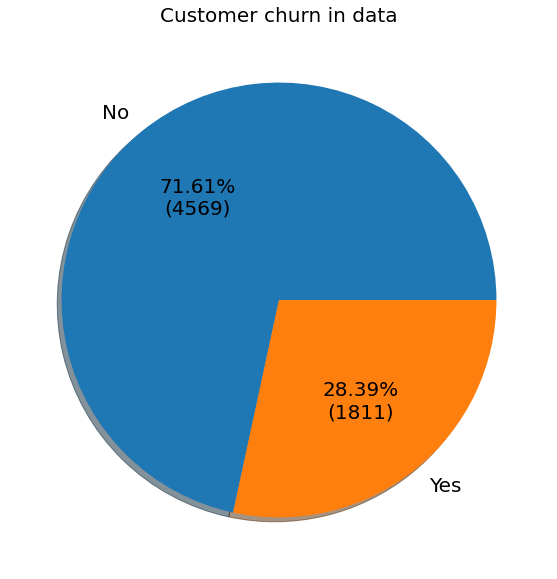

In [17]:
# plot the proportion of churn vs not churn as pie chart
def fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

values = df["Churn"]
v_counts = values.value_counts()
total = len(values)
plt.figure(figsize=(15, 10))
plt.pie(v_counts, labels=v_counts.index, autopct=fmt, shadow=True)
plt.title("Customer churn in data",size=20.0)

<a name="pre"></a>
# 6 Data Pre-processing

## Encoding of Churn column

In [18]:
# encode Churn column as 1/0 binary numerical column
df_use = pd.DataFrame()
df_use["Churn"] = df.Churn
df = df.drop(['Churn'], axis=1)
df_use["Churn"] = df_use["Churn"].map({'Yes': 1, 'No': 0})

## Frequency Encoding

In [19]:
# get categorical comumns and numerical columns
cat_cols = [col for col in df.columns if df[col].dtype=='object']
num_cols = [col for col in df.columns if df[col].dtype!='object']

In [20]:
df[cat_cols].describe().T

,count,unique,top,freq
ServiceArea,6377,519,NYCBRO917,204
ChildrenInHH,6380,2,No,4856
HandsetRefurbished,6380,2,No,5514
HandsetWebCapable,6380,2,Yes,5742
TruckOwner,6380,2,No,5181
RVOwner,6380,2,No,5854
Homeownership,4259,1,Known,4259
BuysViaMailOrder,6380,2,No,4098
RespondsToMailOffers,6380,2,No,3990
OptOutMailings,6380,2,No,6283


In [21]:
# Frequency Encoding
def frequency_encoder(cat_cols, df):
  for col in cat_cols:
    if col in df.columns:
      df = df.join(df[col].map(df[col].value_counts(normalize=True)).to_frame().add_suffix('_frequency'))
  return df

In [22]:
# use frequency encoder to encode categorical columns
df = frequency_encoder(cat_cols, df)
# drop the original categorical columns
df = df.drop(cat_cols, axis=1)

In [23]:
df

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnsweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice,ServiceArea_frequency,ChildrenInHH_frequency,HandsetRefurbished_frequency,HandsetWebCapable_frequency,TruckOwner_frequency,RVOwner_frequency,Homeownership_frequency,BuysViaMailOrder_frequency,RespondsToMailOffers_frequency,OptOutMailings_frequency,NonUSTravel_frequency,OwnsComputer_frequency,HasCreditCard_frequency,NewCellphoneUser_frequency,NotNewCellphoneUser_frequency,OwnsMotorcycle_frequency,MadeCallToRetentionTeam_frequency,CreditRating_frequency,PrizmCode_frequency,Occupation_frequency,MaritalStatus_frequency
0,30.88,436.0,30.0,0.25,1.0,0.0,-112.0,0.1,11.0,0.3,20.0,11.3,0.0,136.3,24.3,7.0,158.0,94.7,11.3,0.0,2.3,20,1,1,4,1,298,58.0,58.0,0,0,0,8,0,150.0,0.018190,0.761129,0.864263,0.9,0.812069,0.917555,1.0,0.35768,0.374608,0.984796,0.944357,0.815517,0.673041,0.801254,0.863009,0.986207,0.965831,0.361912,0.483229,0.744514,0.600304
1,44.83,172.0,45.0,0.00,0.0,0.0,-12.0,-15.5,0.3,0.3,3.7,0.0,0.0,23.1,6.0,2.3,31.3,21.3,0.7,0.0,0.0,22,1,1,2,1,659,28.0,0.0,0,0,0,7,0,80.0,0.001411,0.761129,0.864263,0.9,0.187931,0.082445,1.0,0.64232,0.625392,0.984796,0.944357,0.815517,0.673041,0.801254,0.863009,0.986207,0.965831,0.361912,0.322257,0.744514,0.399696
2,42.63,838.0,50.0,0.74,5.0,0.0,28.0,-2.6,4.7,6.3,62.0,7.3,0.0,198.5,36.0,10.0,113.7,118.3,11.0,0.0,3.3,7,1,1,2,1,182,0.0,0.0,0,0,0,0,0,130.0,0.004548,0.761129,0.864263,0.9,0.812069,0.917555,NaN,0.64232,0.625392,0.984796,0.944357,0.815517,0.326959,0.801254,0.863009,0.986207,0.965831,0.134013,0.322257,0.744514,NaN
3,33.49,358.0,50.0,0.00,0.0,0.0,-16.0,0.0,1.0,4.0,10.0,0.0,0.0,127.5,32.7,30.0,90.7,95.7,5.0,0.0,0.7,22,4,4,2,2,11,52.0,50.0,0,0,0,8,0,150.0,0.007370,0.238871,0.864263,0.9,0.812069,0.917555,1.0,0.35768,0.374608,0.984796,0.944357,0.184483,0.673041,0.801254,0.863009,0.986207,0.965831,0.361912,0.150313,0.744514,0.600304
4,60.94,1276.0,60.0,4.70,0.0,0.0,-188.0,0.2,5.7,19.7,49.7,22.0,0.0,134.8,218.7,9.0,214.7,204.7,25.3,0.0,2.3,18,2,2,2,2,257,0.0,0.0,0,0,0,0,0,30.0,0.029951,0.761129,0.135737,0.9,0.812069,0.917555,NaN,0.64232,0.625392,0.984796,0.944357,0.815517,0.326959,0.198746,0.863009,0.986207,0.965831,0.134013,0.483229,0.744514,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6375,30.48,242.0,40.0,0.50,0.0,0.0,-9.0,0.5,6.0,9.7,70.0,1.7,0.3,12.8,27.7,0.7,59.0,50.0,15.7,0.0,0.0,9,1,1,1,1,264,50.0,50.0,0,0,1,6,0,NaN,0.002195,0.238871,0.864263,0.9,0.812069,0.917555,1.0,0.35768,0.374608,0.984796,0.944357,0.184483,0.673041,0.801254,0.863009,0.986207,0.965831,0.038401,0.150313,0.166301,0.600304
6376,66.17,559.0,45.0,0.00,80.0,0.6,548.0,59.3,3.0,1.3,20.0,0.0,0.0,26.8,6.7,3.3,50.3,33.7,4.3,0.0,0.0,17,2,2,1,1,504,60.0,54.0,0,0,0,7,0,NaN,0.009409,0.761129,0.864263,0.9,0.812069,0.917555,1.0,0.64232,0.625392,0.984796,0.944357,0.815517,0.673041,0.801254,0.863009,0.986207,0.965831,0.361912,0.322257,0.744514,0.600304
6377,99.61,1147.0,60.0,1.73,101.0,0.0,-414.0,-29.6,19.0,1.3,36.7,2.3,0.0,211.4,80.0,2.7,263.0,156.7,20.3,0.0,8.0,14,1,1,3,3,27,0.0,0.0,0,0,0,8,0,100.0,0.010663,0.761129,0.864263,0.9,0.812069,0.917555,1.0,0.64232,0.625392,0.984796,0.944357,0.815517,0.673041,0.198746,0.863009,0.986207,0.965831,0.134013,0.483229,0.744514,NaN
6378,103.63,891.0,65.0,0.74,125.0,0.2,298.0,75.7,12.0,1.3,64.0,1.7,2.0,38.5,31.7,3.0,137.3,48.3,13.3,0.0,2.3,13,2,2,2,2,131,0.0,0.0,0,0,0,0,0,

In [24]:
df.shape

(6380, 56)

## Multivariate Imputation

In [25]:
# use multivariate imputation, the initial strategy is median
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

idf = df.copy()

imp_median = IterativeImputer(missing_values=np.nan, initial_strategy='median', random_state=42)
df_imputed_bayesian = pd.DataFrame(imp_median.fit_transform(idf), index=idf.index, columns=idf.columns)
# to check if the imputation works, if it works, the null_values() should return an empty dataframe
null_values(df_imputed_bayesian)

,Number of missing records,Percentage (%)


In [26]:
# get a copy of the imputed data
df = df_imputed_bayesian.copy()

In [27]:
df

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnsweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice,ServiceArea_frequency,ChildrenInHH_frequency,HandsetRefurbished_frequency,HandsetWebCapable_frequency,TruckOwner_frequency,RVOwner_frequency,Homeownership_frequency,BuysViaMailOrder_frequency,RespondsToMailOffers_frequency,OptOutMailings_frequency,NonUSTravel_frequency,OwnsComputer_frequency,HasCreditCard_frequency,NewCellphoneUser_frequency,NotNewCellphoneUser_frequency,OwnsMotorcycle_frequency,MadeCallToRetentionTeam_frequency,CreditRating_frequency,PrizmCode_frequency,Occupation_frequency,MaritalStatus_frequency
0,30.88,436.0,30.0,0.25,1.0,0.0,-112.0,0.1,11.0,0.3,20.0,11.3,0.0,136.3,24.3,7.0,158.0,94.7,11.3,0.0,2.3,20.0,1.0,1.0,4.0,1.0,298.0,58.0,58.0,0.0,0.0,0.0,8.0,0.0,150.000000,0.018190,0.761129,0.864263,0.9,0.812069,0.917555,1.0,0.35768,0.374608,0.984796,0.944357,0.815517,0.673041,0.801254,0.863009,0.986207,0.965831,0.361912,0.483229,0.744514,0.600304
1,44.83,172.0,45.0,0.00,0.0,0.0,-12.0,-15.5,0.3,0.3,3.7,0.0,0.0,23.1,6.0,2.3,31.3,21.3,0.7,0.0,0.0,22.0,1.0,1.0,2.0,1.0,659.0,28.0,0.0,0.0,0.0,0.0,7.0,0.0,80.000000,0.001411,0.761129,0.864263,0.9,0.187931,0.082445,1.0,0.64232,0.625392,0.984796,0.944357,0.815517,0.673041,0.801254,0.863009,0.986207,0.965831,0.361912,0.322257,0.744514,0.399696
2,42.63,838.0,50.0,0.74,5.0,0.0,28.0,-2.6,4.7,6.3,62.0,7.3,0.0,198.5,36.0,10.0,113.7,118.3,11.0,0.0,3.3,7.0,1.0,1.0,2.0,1.0,182.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.000000,0.004548,0.761129,0.864263,0.9,0.812069,0.917555,1.0,0.64232,0.625392,0.984796,0.944357,0.815517,0.326959,0.801254,0.863009,0.986207,0.965831,0.134013,0.322257,0.744514,0.390584
3,33.49,358.0,50.0,0.00,0.0,0.0,-16.0,0.0,1.0,4.0,10.0,0.0,0.0,127.5,32.7,30.0,90.7,95.7,5.0,0.0,0.7,22.0,4.0,4.0,2.0,2.0,11.0,52.0,50.0,0.0,0.0,0.0,8.0,0.0,150.000000,0.007370,0.238871,0.864263,0.9,0.812069,0.917555,1.0,0.35768,0.374608,0.984796,0.944357,0.184483,0.673041,0.801254,0.863009,0.986207,0.965831,0.361912,0.150313,0.744514,0.600304
4,60.94,1276.0,60.0,4.70,0.0,0.0,-188.0,0.2,5.7,19.7,49.7,22.0,0.0,134.8,218.7,9.0,214.7,204.7,25.3,0.0,2.3,18.0,2.0,2.0,2.0,2.0,257.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.000000,0.029951,0.761129,0.135737,0.9,0.812069,0.917555,1.0,0.64232,0.625392,0.984796,0.944357,0.815517,0.326959,0.198746,0.863009,0.986207,0.965831,0.134013,0.483229,0.744514,0.365529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6375,30.48,242.0,40.0,0.50,0.0,0.0,-9.0,0.5,6.0,9.7,70.0,1.7,0.3,12.8,27.7,0.7,59.0,50.0,15.7,0.0,0.0,9.0,1.0,1.0,1.0,1.0,264.0,50.0,50.0,0.0,0.0,1.0,6.0,0.0,85.449608,0.002195,0.238871,0.864263,0.9,0.812069,0.917555,1.0,0.35768,0.374608,0.984796,0.944357,0.184483,0.673041,0.801254,0.863009,0.986207,0.965831,0.038401,0.150313,0.166301,0.600304
6376,66.17,559.0,45.0,0.00,80.0,0.6,548.0,59.3,3.0,1.3,20.0,0.0,0.0,26.8,6.7,3.3,50.3,33.7,4.3,0.0,0.0,17.0,2.0,2.0,1.0,1.0,504.0,60.0,54.0,0.0,0.0,0.0,7.0,0.0,56.818354,0.009409,0.761129,0.864263,0.9,0.812069,0.917555,1.0,0.64232,0.625392,0.984796,0.944357,0.815517,0.673041,0.801254,0.863009,0.986207,0.965831,0.361912,0.322257,0.744514,0.600304
6377,99.61,1147.0,60.0,1.73,101.0,0.0,-414.0,-29.6,19.0,1.3,36.7,2.3,0.0,211.4,80.0,2.7,263.0,156.7,20.3,0.0,8.0,14.0,1.0,1.0,3.0,3.0,27.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,100.000000,0.010663,0.761129,0.864263,0.9,0.812069,0.917555,1.0,0.64232,0.625392,0.984796,0.944357

<a name="eval_DT_no_FS"></a>
# 7 Evaluation of the Decision Trees models (without feature selection)

## Model Building

In [28]:
def prediction(algorithm, training_x, testing_x, training_y, testing_y):
    """
    Takes in algorithm, fits it with training_x, training_y,
    calculate the predictions
    """ 
    algorithm.fit(training_x, training_y)
    predictions = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
        
    print('Algorithm:', type(algorithm).__name__)
    print("\nClassification report:\n", classification_report(testing_y, predictions))
    print("Accuracy Score:", accuracy_score(testing_y, predictions))

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, matthews_corrcoef
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score

import statsmodels.api as sm
from yellowbrick.classifier import DiscriminationThreshold

# define the features used i.e. X and the target
cols = list(df.columns)
X = df
target = df_use["Churn"]

# split the dataset to train and test datasets
x_train, x_test, y_train, y_test = train_test_split(X, target, 
                                                    test_size = .25, random_state = 111)

In [30]:
def treeplot(classifier, cols, classnames):
    """
    Takes in classifier, cols, classnames
    Plots the decision tree
    """ 
    graph = Source(tree.export_graphviz(classifier, out_file=None, 
                                        rounded=True, proportion=False,
                                        feature_names = cols, 
                                        precision = 2,
                                        class_names = classnames,
                                        filled = True)
                  )
    display(graph)

Algorithm: DecisionTreeClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81      1160
           1       0.41      0.22      0.29       435

    accuracy                           0.70      1595
   macro avg       0.58      0.55      0.55      1595
weighted avg       0.66      0.70      0.67      1595

Accuracy Score: 0.7009404388714734


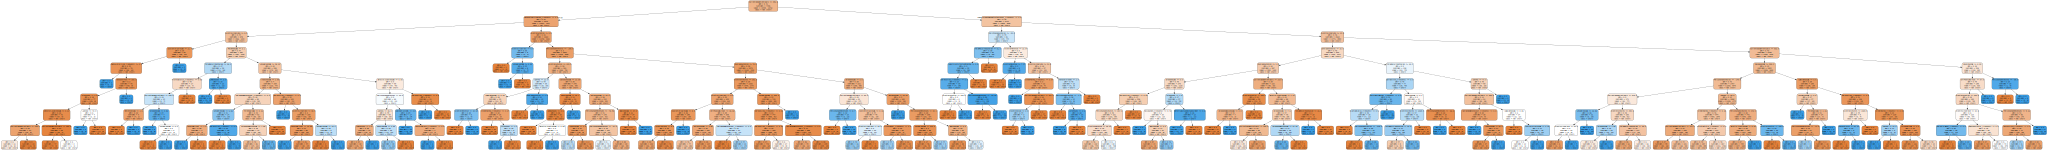

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG, display

# define the decision tree classifier
decision_tree = DecisionTreeClassifier(max_depth = 9, random_state = 123,
                                       splitter = "best", criterion = "gini")
# calculate the prediction
prediction(decision_tree, x_train, x_test, y_train, y_test)

# plot the decision tree
treeplot(decision_tree, cols, ["Not churn", "Churn"])

## Model performances over the testing dataset

In [32]:
# put the model name, model class and used columns in a dictionary
models = {'No feature selection': [decision_tree, cols]}

## Model performance metrics

In [33]:
def model_report(model, training_x, testing_x, training_y, testing_y, name):
    """
    Takes in model, training_x, testing_x, training_y, testing_y, name
    Puts model report in a dataframe
    """ 
    model = model.fit(training_x, training_y)
    predictions = model.predict(testing_x)
    accuracy = accuracy_score(testing_y, predictions)
    recallscore = recall_score(testing_y, predictions)
    precision = precision_score(testing_y, predictions)
    roc_auc = roc_auc_score(testing_y, predictions)
    f1score = f1_score(testing_y, predictions) 
    mcc_metric = matthews_corrcoef(testing_y, predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy"        : [accuracy],
                       "Recall"          : [recallscore],
                       "Precision"       : [precision],
                       "F1-score"        : [f1score],
                       "ROC_AUC"         : [roc_auc],
                       "MCC_metric"    : [mcc_metric],
                      })
    return df

In [35]:
# calculate the model performance on the test dataset
model_performances_train = pd.DataFrame() 
for name in models:
    model_performances_train = model_performances_train.append(model_report(models[name][0], x_train[models[name][1]], 
                                                                                x_test[models[name][1]], 
                                                                                y_train, y_test, name), ignore_index=True)
        
table_train = ff.create_table(np.round(model_performances_train, 4))
py.iplot(table_train)

<a name="select_no_loop"></a>
# 8 Feature selection

In [36]:
# get all the features
all_features = df.columns
all_features = list(all_features)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn.model_selection import *
# use the Matthews correlation coefficient (MCC)
mcc = make_scorer(matthews_corrcoef)
# define the X (using all features)
X = df[all_features]
# define the target y 
y = df_use["Churn"].values
# define the decision tree classifier
estimator = DecisionTreeClassifier(max_depth = 9, random_state = 123,
                                       splitter = "best", criterion = "gini")

In [52]:
# use genetic algorithm and decision tree classifier
# by varying the max_features (maximum number of features)
# from i = 2 to i = 30
# to get a report of the best selected featrues by using Matthews correlation coefficient (MCC)
report = pd.DataFrame()
n_features = [] 
chosen_features = [] 
cv_score = [] 
rkf = RepeatedStratifiedKFold(n_repeats = 20, n_splits = 5)
for i in range(2, 31):
  
  selector = GeneticSelectionCV(estimator,
                                cv = rkf,
                                verbose = 0,
                                scoring = mcc,
                                max_features = i,
                                n_population = 200,
                                crossover_proba = 0.5,
                                mutation_proba = 0.2,
                                n_generations = 10,
                                crossover_independent_proba=0.5,
                                mutation_independent_proba=0.1,
                                n_gen_no_change=10,
                                caching=True,
                                n_jobs=-1)
  selector = selector.fit(X, y)
  generation_features = X.columns[selector.support_]
  generation_features = list(generation_features)
  print("i = ",i)
  print("Chosen Features:  ", generation_features)

  cv_score = selector.generation_scores_[-1]
  n_features.append(len(generation_features)) 
  chosen_features.append(generation_features) 
  cv_score.append(cv_score)
report["Number of Features"] = n_features
report["Chosen Features"] = chosen_features
report["Scores"] = cv_score
print("\nFeature selection is finished")

i =  2
Chosen Features:   ['CurrentEquipmentDays', 'MadeCallToRetentionTeam_frequency']
i =  3
Chosen Features:   ['HandsetModels', 'HandsetRefurbished_frequency', 'MadeCallToRetentionTeam_frequency']
i =  4
Chosen Features:   ['MonthlyMinutes', 'PercChangeMinutes', 'CurrentEquipmentDays', 'RetentionCalls']
i =  5
Chosen Features:   ['MonthlyMinutes', 'PercChangeMinutes', 'CurrentEquipmentDays', 'RetentionCalls', 'ReferralsMadeBySubscriber']
i =  6
Chosen Features:   ['MonthlyMinutes', 'PercChangeMinutes', 'CurrentEquipmentDays', 'OwnsComputer_frequency', 'NotNewCellphoneUser_frequency', 'MadeCallToRetentionTeam_frequency']
i =  7
Chosen Features:   ['MonthlyMinutes', 'PercChangeMinutes', 'DroppedBlockedCalls', 'ActiveSubs', 'CurrentEquipmentDays', 'RetentionCalls', 'ReferralsMadeBySubscriber']
i =  8
Chosen Features:   ['MonthlyMinutes', 'PercChangeMinutes', 'DroppedBlockedCalls', 'UniqueSubs', 'CurrentEquipmentDays', 'RetentionCalls', 'RetentionOffersAccepted']
i =  9
Chosen Features

i =  30
Chosen Features:   ['MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'BlockedCalls', 'UniqueSubs', 'ActiveSubs', 'CurrentEquipmentDays', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'AdjustmentsToCreditRating', 'HandsetRefurbished_frequency', 'HandsetWebCapable_frequency', 'TruckOwner_frequency', 'OwnsComputer_frequency', 'HasCreditCard_frequency', 'MadeCallToRetentionTeam_frequency', 'CreditRating_frequency']

Feature selection is finished


In [53]:
# round the numerical values to 3 decimal places
report["Scores"] = np.round(report["Scores"], 3)
# sort the table by "Scores", in Descending order
report.sort_values(by = "Scores", ascending = False, inplace = True)
GA_features = report.iloc[0]["Chosen Features"]

In [54]:
print(GA_features)

['MonthlyMinutes', 'TotalRecurringCharge', 'OverageMinutes', 'PercChangeMinutes', 'MonthsInService', 'UniqueSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'RetentionCalls', 'ReferralsMadeBySubscriber', 'HandsetRefurbished_frequency', 'Homeownership_frequency', 'OwnsComputer_frequency', 'HasCreditCard_frequency', 'NotNewCellphoneUser_frequency', 'MadeCallToRetentionTeam_frequency', 'Occupation_frequency']


In [55]:
report

,Number of Features,Chosen Features,Scores
27,18,"[MonthlyMinutes, TotalRecurringCharge, OverageMinutes, PercChangeMinutes, MonthsInService, UniqueSubs, Handsets, HandsetModels, CurrentEquipmentDays, RetentionCalls, ReferralsMadeBySubscriber, HandsetRefurbished_frequency, Homeownership_frequency, OwnsComputer_frequency, HasCreditCard_frequency, NotNewCellphoneUser_frequency, MadeCallToRetentionTeam_frequency, Occupation_frequency]",0.118
18,17,"[MonthlyMinutes, TotalRecurringCharge, OverageMinutes, PercChangeMinutes, PercChangeRevenues, CallForwardingCalls, MonthsInService, UniqueSubs, Handsets, CurrentEquipmentDays, RetentionOffersAccepted, HandsetRefurbished_frequency, OptOutMailings_frequency, NonUSTravel_frequency, OwnsComputer_frequency, OwnsMotorcycle_frequency, MadeCallToRetentionTeam_frequency]",0.118
16,16,"[MonthlyMinutes, DirectorAssistedCalls, OverageMinutes, PercChangeMinutes, BlockedCalls, DroppedBlockedCalls, UniqueSubs, Handsets, CurrentEquipmentDays, IncomeGroup, ChildrenInHH_frequency, HandsetRefurbished_frequency, RVOwner_frequency, OptOutMailings_frequency, NonUSTravel_frequency, MadeCallToRetentionTeam_frequency]",0.115
26,16,"[MonthlyMinutes, OverageMinutes, PercChangeMinutes, CallWaitingCalls, MonthsInService, UniqueSubs, CurrentEquipmentDays, ReferralsMadeBySubscriber, AdjustmentsToCreditRating, HandsetRefurbished_frequency, RVOwner_frequency, BuysViaMailOrder_frequency, NonUSTravel_frequency, OwnsComputer_frequency, NewCellphoneUser_frequency, MadeCallToRetentionTeam_frequency]",0.115
25,15,"[MonthlyMinutes, TotalRecurringCharge, OverageMinutes, PercChangeMinutes, MonthsInService, HandsetModels, CurrentEquipmentDays, RetentionCalls, HandsetRefurbished_frequency, Homeownership_frequency, BuysViaMailOrder_frequency, RespondsToMailOffers_frequency, NonUSTravel_frequency, OwnsComputer_frequency, OwnsMotorcycle_frequency]",0.115
15,12,"[MonthlyMinutes, TotalRecurringCharge, OverageMinutes, PercChangeMinutes, DroppedCalls, MonthsInService, UniqueSubs, CurrentEquipmentDays, RetentionCalls, HandsetRefurbished_frequency, OptOutMailings_frequency, HasCreditCard_frequency]",0.114
14,12,"[MonthlyMinutes, TotalRecurringCharge, PercChangeMinutes, BlockedCalls, DroppedBlockedCalls, ActiveSubs, CurrentEquipmentDays, RetentionOffersAccepted, AdjustmentsToCreditRating, HandsetRefurbished_frequency, TruckOwner_frequency, MadeCallToRetentionTeam_frequency]",0.113
7,9,"[MonthlyMinutes, OverageMinutes, PercChangeMinutes, MonthsInService, CurrentEquipmentDays, RetentionCalls, HandsetRefurbished_frequency, OwnsMotorcycle_frequency, MadeCallToRetentionTeam_frequency]",0.113
21,18,"[MonthlyRevenue, MonthlyMinutes, TotalRecurringCharge, OverageMinutes, PercChangeMinutes, CallForwardingCalls, MonthsInService, UniqueSubs, CurrentEquipmentDays, RetentionOffersAccepted, HandsetRefurbished_frequency, RVOwner_frequency, BuysViaMailOrder_frequency, OptOutMailings_frequency, NonUSTravel_frequency, NewCellphoneUser_frequency, MadeCallToRetentionTeam_frequency, Occupation_frequency]",0.113
17,16,"[MonthlyMinutes, OverageMinutes, PercChangeMinutes, DroppedCalls, CallWaitingCalls, MonthsInService, UniqueSubs, Handsets, HandsetModels, CurrentEquipmentDays, ReferralsMadeBySubscriber, HandsetRefurbished_frequency, Homeownership_frequency, OptOutMailings_frequency, OwnsComputer_frequency, MadeCallToRetentionTeam_frequency]",0.113


## save selected features

In [56]:
a_list = GA_features
textfile = open("features_selected_new.txt", "w")
for element in a_list:
    textfile.write(element + "\n")
textfile.close()

<a name='output'></a>
# 9 File Output

## combine df and df_use

In [53]:
df_out = df.join(df_use)

In [54]:
df_out

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnsweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice,ServiceArea_frequency,ChildrenInHH_frequency,HandsetRefurbished_frequency,HandsetWebCapable_frequency,TruckOwner_frequency,RVOwner_frequency,Homeownership_frequency,BuysViaMailOrder_frequency,RespondsToMailOffers_frequency,OptOutMailings_frequency,NonUSTravel_frequency,OwnsComputer_frequency,HasCreditCard_frequency,NewCellphoneUser_frequency,NotNewCellphoneUser_frequency,OwnsMotorcycle_frequency,MadeCallToRetentionTeam_frequency,CreditRating_frequency,PrizmCode_frequency,Occupation_frequency,MaritalStatus_frequency,Churn
0,30.88,436.0,30.0,0.25,1.0,0.0,-112.0,0.1,11.0,0.3,20.0,11.3,0.0,136.3,24.3,7.0,158.0,94.7,11.3,0.0,2.3,20.0,1.0,1.0,4.0,1.0,298.0,58.0,58.0,0.0,0.0,0.0,8.0,0.0,150.000000,0.018190,0.761129,0.864263,0.9,0.812069,0.917555,1.0,0.35768,0.374608,0.984796,0.944357,0.815517,0.673041,0.801254,0.863009,0.986207,0.965831,0.361912,0.483229,0.744514,0.600304,1
1,44.83,172.0,45.0,0.00,0.0,0.0,-12.0,-15.5,0.3,0.3,3.7,0.0,0.0,23.1,6.0,2.3,31.3,21.3,0.7,0.0,0.0,22.0,1.0,1.0,2.0,1.0,659.0,28.0,0.0,0.0,0.0,0.0,7.0,0.0,80.000000,0.001411,0.761129,0.864263,0.9,0.187931,0.082445,1.0,0.64232,0.625392,0.984796,0.944357,0.815517,0.673041,0.801254,0.863009,0.986207,0.965831,0.361912,0.322257,0.744514,0.399696,0
2,42.63,838.0,50.0,0.74,5.0,0.0,28.0,-2.6,4.7,6.3,62.0,7.3,0.0,198.5,36.0,10.0,113.7,118.3,11.0,0.0,3.3,7.0,1.0,1.0,2.0,1.0,182.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.000000,0.004548,0.761129,0.864263,0.9,0.812069,0.917555,1.0,0.64232,0.625392,0.984796,0.944357,0.815517,0.326959,0.801254,0.863009,0.986207,0.965831,0.134013,0.322257,0.744514,0.390584,0
3,33.49,358.0,50.0,0.00,0.0,0.0,-16.0,0.0,1.0,4.0,10.0,0.0,0.0,127.5,32.7,30.0,90.7,95.7,5.0,0.0,0.7,22.0,4.0,4.0,2.0,2.0,11.0,52.0,50.0,0.0,0.0,0.0,8.0,0.0,150.000000,0.007370,0.238871,0.864263,0.9,0.812069,0.917555,1.0,0.35768,0.374608,0.984796,0.944357,0.184483,0.673041,0.801254,0.863009,0.986207,0.965831,0.361912,0.150313,0.744514,0.600304,0
4,60.94,1276.0,60.0,4.70,0.0,0.0,-188.0,0.2,5.7,19.7,49.7,22.0,0.0,134.8,218.7,9.0,214.7,204.7,25.3,0.0,2.3,18.0,2.0,2.0,2.0,2.0,257.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.000000,0.029951,0.761129,0.135737,0.9,0.812069,0.917555,1.0,0.64232,0.625392,0.984796,0.944357,0.815517,0.326959,0.198746,0.863009,0.986207,0.965831,0.134013,0.483229,0.744514,0.365529,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6375,30.48,242.0,40.0,0.50,0.0,0.0,-9.0,0.5,6.0,9.7,70.0,1.7,0.3,12.8,27.7,0.7,59.0,50.0,15.7,0.0,0.0,9.0,1.0,1.0,1.0,1.0,264.0,50.0,50.0,0.0,0.0,1.0,6.0,0.0,85.449608,0.002195,0.238871,0.864263,0.9,0.812069,0.917555,1.0,0.35768,0.374608,0.984796,0.944357,0.184483,0.673041,0.801254,0.863009,0.986207,0.965831,0.038401,0.150313,0.166301,0.600304,0
6376,66.17,559.0,45.0,0.00,80.0,0.6,548.0,59.3,3.0,1.3,20.0,0.0,0.0,26.8,6.7,3.3,50.3,33.7,4.3,0.0,0.0,17.0,2.0,2.0,1.0,1.0,504.0,60.0,54.0,0.0,0.0,0.0,7.0,0.0,56.818354,0.009409,0.761129,0.864263,0.9,0.812069,0.917555,1.0,0.64232,0.625392,0.984796,0.944357,0.815517,0.673041,0.801254,0.863009,0.986207,0.965831,0.361912,0.322257,0.744514,0.600304,0
6377,99.61,1147.0,60.0,1.73,101.0,0.0,-414.0,-29.6,19.0,1.3,36.7,2.3,0.0,211.4,80.0,2.7,263.0,156.7,20.3,0.0,8.0,14.0,1.0,1.0,3.0,3.0,27.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,100.000000,0.010663,0.761129,0.864263,0.9,0.812069,0.917555,1.0,0.64232,0.

## output df_out

In [55]:
df_out.to_csv('./df_imputed.csv', index = False)

# End